# Experiment with MNIST dataset with TensorBoard

**The main aim of this notebook is to understand how to use TensorBoard in my machine learning workflow. To do this, I would have to first build a model using the MNIST Handwritten Digits Dataset.**

*import libraries*

In [1]:
import numpy as np
import io
import matplotlib.pyplot as plt
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import summary
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.image import decode_png
from tensorflow import expand_dims
import visualkeras
import itertools 
from sklearn.metrics import confusion_matrix


## Dataset

The MNIST dataset is used in this notebook, and contains the training data, and the test data.

In [2]:
# mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# This scales each value to be between 0 and 1.
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
# Check shape of full training data.
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c
<br> y_train and y_test were not onehotencoded. This is because the model later will use 'sparse_categorical_crossentropy' as a loss function. If using 'categorical_crossentropy' as loss function, the y labels needed to be hotencoded (as cell below).

In [6]:
# # Change y_train.
# y_train = utils.to_categorical(y_train, 10)
# y_test = utils.to_categorical(y_test, 10)

## Model building

In [7]:
model = Sequential([
   Flatten(input_shape=(28, 28)),
   Dense(512, activation='relu'),
   Dropout(0.2),
   Dense(10, activation='softmax')])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
visualkeras.layered_view(model, to_file='model.png').show()

In [10]:
model.compile(optimizer='sgd', 
   loss='sparse_categorical_crossentropy',
   metrics=['accuracy'])

In [11]:
# %load_ext tensorboard
%reload_ext tensorboard
log_folder = 'logs'

In [12]:
callbacks = [TensorBoard(log_dir=log_folder,
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)]

In [13]:
history = model.fit(X_train, y_train,
                  epochs=10,
                  validation_split=0.2,
                  callbacks=callbacks)

Epoch 1/10
   1/1500 [..............................] - ETA: 0s - loss: 2.3237 - accuracy: 0.1875WARNING:tensorflow:From C:\Users\USER\anaconda3\envs\dsi24\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6968 - accuracy: 0.8211 - val_loss: 0.3661 - val_accuracy: 0.9019
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3721 - accuracy: 0.8965 - val_loss: 0.2972 - val_accuracy: 0.9186
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3160 - accuracy: 0.9103 - val_loss: 0.2636 - val_accuracy: 0.9262
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2792 - accuracy: 0.9214 - val_loss: 0.2395 - val_accuracy: 0.9330
Epoch 5/10
1500/1500 [=======================

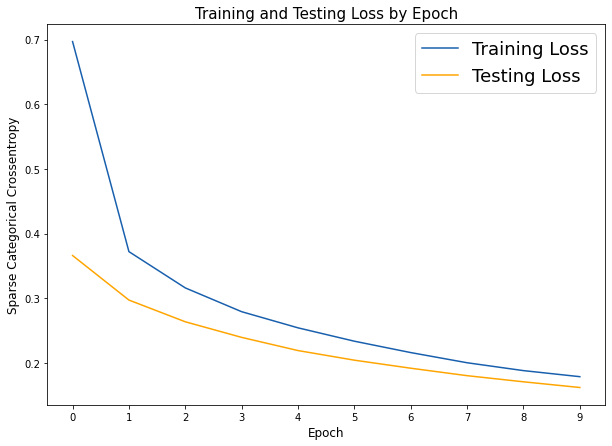

In [14]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(10, 7))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Sparse Categorical Crossentropy', fontsize=12)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

In [15]:
# Evaluate model on test data.
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.1598 - accuracy: 0.9543
loss: 0.15983706712722778
accuracy: 0.9542999863624573


## TensorBoard

Launch TensorBoard

In [16]:
%tensorboard --logdir={log_folder}

Reusing TensorBoard on port 6006 (pid 12840), started 10:53:21 ago. (Use '!kill 12840' to kill it.)

In [17]:
# launch in browser
# http://localhost:6006

**Image summary in TensorBoard**

In [18]:
logdir = "logs/train_data/"
file_writer = summary.create_file_writer(logdir)

In [19]:
# visualize it in TensorBoard under '20 Digits' in the Images tab
with file_writer.as_default():
    # (28x28x1) images are grayscale
    # index 20:30 
    images = np.reshape(X_train[10:30], (-1, 28, 28, 1))
    summary.image("20 Digits", images, max_outputs=25, step=0)

In [20]:
class_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
logdir = "logs/plots/"
file_writer = summary.create_file_writer(logdir)

In [21]:
def image_grid():  
    figure = plt.figure(figsize=(12,8))

    for i in range(36):    
        plt.subplot(6, 6, i + 1)
        plt.xlabel(class_names[y_train[i]])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i], cmap=plt.cm.coolwarm)

    return figure

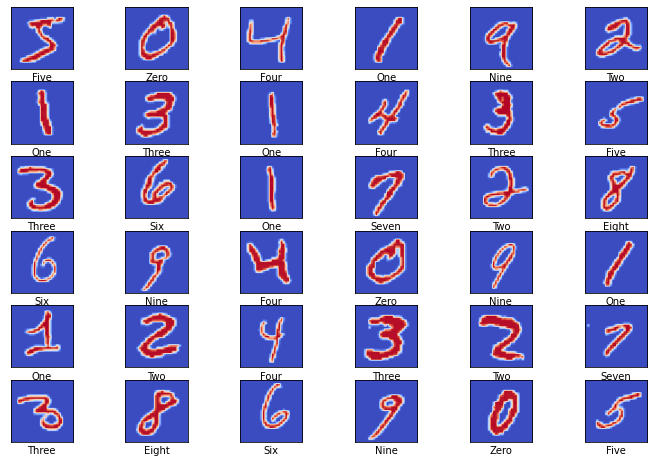

In [22]:
# plot images here
figure = image_grid()

In [23]:
# visualize it in TensorBoard
def plot_to_image(figure):    
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(figure)
    buf.seek(0)

    digit = decode_png(buf.getvalue(), channels=4)    # channels=4 output an RGBA image
    digit = expand_dims(digit, axis=0)                # [1,28,28,1]

    return digit

In [24]:
# visualize it in TensorBoard under 'MNIST Digits' in the Images tab
with file_writer.as_default():    
    summary.image("MNIST Digits", plot_to_image(figure), step=0);

<Figure size 432x288 with 0 Axes>

In [25]:
%reload_ext tensorboard
%tensorboard --logdir logs/plots

Reusing TensorBoard on port 6006 (pid 18600), started 4:19:29 ago. (Use '!kill 18600' to kill it.)

**Confusion matrix in TensorBoard**

In [26]:
def plot_confusion_matrix(cm, class_names): 
    figure = plt.figure(figsize=(8, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent) 
    plt.title("Confusion matrix") 
    plt.colorbar() 
    tick_marks = np.arange(len(class_names)) 
    plt.xticks(tick_marks, class_names, rotation=45) 
    plt.yticks(tick_marks, class_names)

    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)  
    threshold = cm.max() / 2. 

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):   
        color = "white" if cm[i, j] > threshold else "black"   
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)  
    
    plt.tight_layout() 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label') 

    return figure

In [27]:
logdir = "logs"
file_writer_cm = summary.create_file_writer(logdir)

In [28]:
def log_confusion_matrix(epoch, logs):
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)

    cm = confusion_matrix(y_test, predictions)
    figure = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figure)
    
    with file_writer_cm.as_default():
        summary.image("Confusion Matrix", cm_image, step=epoch)

In [29]:
callbacks = [
   TensorBoard(log_dir=log_folder, 
               histogram_freq=1, 
               write_graph=True,
               write_images=True,
               update_freq='epoch',
               profile_batch=2,
               embeddings_freq=1),
   keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)
]

model.fit(X_train, y_train,
          epochs=10,
          validation_split=0.2,
          callbacks=callbacks)

Epoch 1/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1677 - accuracy: 0.9532 - val_loss: 0.1555 - val_accuracy: 0.9575
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1589 - accuracy: 0.9547 - val_loss: 0.1500 - val_accuracy: 0.9589
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1521 - accuracy: 0.9575 - val_loss: 0.1439 - val_accuracy: 0.9603
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1447 - accuracy: 0.9602 - val_loss: 0.1393 - val_accuracy: 0.9610
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1391 - accuracy: 0.9609 - val_loss: 0.1348 - val_accuracy: 0.9623
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1326 - accuracy: 0.9622 - val_loss: 0.1317 - val_accuracy: 0.9632
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1263 - accuracy: 0.9649 - val_loss: 0.1274 - val_accurac

In [30]:
# confusion matrix is in the Images tab
%reload_ext tensorboard
%tensorboard --logdir logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 14300.

**Hyperparameter tuning in TensorBoard**

Using to visualize parameter optimization

In [31]:
from tensorboard.plugins.hparams import api as hp
logdir = "logs"

In [32]:
# define parameters to tune 
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([300, 200,512]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1,0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd', 'rmsprop']))

In [33]:
METRIC_ACCURACY = 'accuracy'

with summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
        hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],)

In [34]:
def create_model(hparams):
    '''building feedforward model using hyperparameters'''
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(hparams[HP_NUM_UNITS],  activation='relu'),
        Dropout(hparams[HP_DROPOUT]),
        Dense(10, activation='softmax')])

    model.compile(optimizer=hparams[HP_OPTIMIZER],
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=5)
    loss, accuracy = model.evaluate(X_test, y_test)
    
    return accuracy

In [35]:
def experiment(experiment_dir, hparams):
    '''log accuracy when tuning parameters'''
    with summary.create_file_writer(experiment_dir).as_default():
        hp.hparams(hparams)
        accuracy = create_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [36]:
# running combinations of parameters 
experiment_no = 0

for num_units in HP_NUM_UNITS.domain.values:
    for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
        for optimizer in HP_OPTIMIZER.domain.values:
            hparams = {
                HP_NUM_UNITS: num_units,
                HP_DROPOUT: dropout_rate,
                HP_OPTIMIZER: optimizer,}

            experiment_name = f'Experiment {experiment_no}'
            print(f'Starting Experiment: {experiment_name}')
            print({h.name: hparams[h] for h in hparams})
            experiment('logs/hparam_tuning/' + experiment_name, hparams)
            experiment_no += 1

Starting Experiment: Experiment 0
{'num_units': 200, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2487 - accuracy: 0.9282
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1097 - accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0777 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9757
Starting Experiment: Experiment 1
{'num_units': 200, 'dropout': 0.1, 'optimizer': 'rmsprop'}
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2438 - accuracy: 0.9294
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1177 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9748
Epoch 4/5
1

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3427 - accuracy: 0.9015
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3019 - accuracy: 0.9145
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2043 - accuracy: 0.9412
Starting Experiment: Experiment 12
{'num_units': 512, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2081 - accuracy: 0.9395
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0883 - accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0614 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0463 - accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9766
Starting Experiment: Experiment 13
{'num_units': 512, 'dropout': 0.1, 'optimizer': 'rmsprop'}
Epoch 1/5
1875/1875 [

In [37]:
%reload_ext tensorboard
%tensorboard --logdir logs/hparam_tuning

Reusing TensorBoard on port 6006 (pid 19596), started 0:47:52 ago. (Use '!kill 19596' to kill it.)

In [38]:
callbacks = [TensorBoard(log_dir=log_folder, 
                                            profile_batch='10,20')]

model.fit(X_train, y_train,
          epochs=10,
          validation_split=0.2,
          callbacks=callbacks)

Epoch 1/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1110 - accuracy: 0.9693 - val_loss: 0.1154 - val_accuracy: 0.9682
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1063 - accuracy: 0.9704 - val_loss: 0.1126 - val_accuracy: 0.9685
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1023 - accuracy: 0.9723 - val_loss: 0.1107 - val_accuracy: 0.9685
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1003 - accuracy: 0.9722 - val_loss: 0.1091 - val_accuracy: 0.9683
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0966 - accuracy: 0.9730 - val_loss: 0.1064 - val_accuracy: 0.9692
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0939 - accuracy: 0.9740 - val_loss: 0.1055 - val_accuracy: 0.9696
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0920 - accuracy: 0.9746 - val_loss: 0.1028 - val_accurac

In [39]:
# visualize it in TensorBoard under 'accuracy' in the scalars tab
%reload_ext tensorboard
%tensorboard --logdir=logs

Reusing TensorBoard on port 6006 (pid 12840), started 11:07:44 ago. (Use '!kill 12840' to kill it.)